<img
src="https://www.imt-atlantique.fr/sites/default/files/Images/Ecole/charte-graphique/IMT_Atlantique_logo_RVB_Baseline_400x272.jpg"
WIDTH=200 HEIGHT=200>

<CENTER>
</br>
<p><font size="5"> TAF MCE - 2019</span></p>
<p><font size="4">  UE Numerical Methods </font></p>
<p></p>
<p><font size="5">  Notebook 06: Lab - LMS Algorithm - Statement </font></p>
</p></br>
<p></p>
<p><font size="5">  Gonzalo Quintana </font></p>
</p></br>
</p>
</CENTER>


--------


# <span style="color:#00B8DE"> LMS equalization for digital data recovery </span>


> - 1  - Generate $n_s=10^4$ symbols of a BPSK modulation.
> - 2  - Convolve symbols with a filter with impulse response given by vector ${\bf h} \propto [1, .8, .3]$ and $\parallel {\bf h}\parallel = 1$. This filter represents the effect of propagation channel on transmitted symbols.
> - 3  - Add noise so as to achieve a fixed SNR at the receiver side. Plot the values of the first 20 symbols and that of the first 20 data samples as well as their sign for $SNR=20dB$. What do we note.
> - 4  - Check that even in the absence of noise the error probability $P_e$ resulting from decisions based on data thresholding would not be zero. Estimate the value of $P_e$ in the absence of equalization.
> - 5  - Implement an LMS filter with impulse response ${\bf w}$ of length $l_w=10$. The stepsize is set to half the maximum suggested stepsize and $SNR=20dB$.
> - 6  - plot the evolution of the distance $\parallel {\bf w}_{MSE}-{\bf w}_{LMS}\parallel $  between the $MSE$ estimate ${\bf w}_{MSE}$ of ${\bf w}$ and successsive LMS estimates $
{\bf w}_{LMS}$.
> - 7  - Study the convergence of the filter, depending on the SNR. 
> - 8  - Train the filter with $n_s=10^4$ symbols. Then generate data for $n_s=10^6$ symbols and $SNR=15dB$. Observe the histogram of data. Whate do you note?
> - 9  - deconvolve the sequence. Estimate the error probability $P_e$. Observe the histograms of equalizer output. remarks?
> - 10 - Analyze the influence of the different parameters (stepsize, SNR, impulse response ${\bf h}$, length of the training sequence, ...) on the behavior of the algorithm. 

## <span style="color:#00B8DE"> Data generation </span>

In [142]:
using LinearAlgebra: norm, tr, eigvals
using StatsBase
using ToeplitzMatrices
using Plots
using DSP
pyplot()

Plots.PyPlotBackend()

In [2]:
function convo(x,h)
    l_x = size(x,1)
    l_h = size(h,2)
    y = zeros(l_x)
    
    for i = 1:l_x
        for j = 1:l_h
            if (i-j)<= 0
              y[i] = 0
            else
                y[i] += h[j]*x[i-j]
            end
        end
    end
    return y
end

convo (generic function with 1 method)

In [166]:
using Random

n = 10000
h = [1,0.8,0.3]
h = h/norm(h)
print(h)

signal = sign.(randn(n));

[0.7602859212697054, 0.6082287370157644, 0.22808577638091163]

In [167]:
SNR = 20
σ_n = 10^(-SNR/20)

y = conv(signal,h)[1:n]

y_n = y + σ_n*randn(n)

10000-element Array{Float64,1}:
 -0.7434004877300756  
  0.1454297216532951  
  1.1269629893845476  
  0.10732058179354398 
 -0.9078340142250662  
 -0.12256490061988534 
  1.2405228160198283  
  1.4315611749390937  
  0.14294133876239756 
  0.426796145208382   
 -0.39689781953069003 
 -1.1155559633629109  
 -0.022978849726134433
  ⋮                   
 -1.2548669383555093  
 -1.6209102644194002  
 -1.58491027423982    
 -0.2726464257618415  
  1.1842048209403184  
 -0.02476532916753338 
 -1.0454177749412144  
 -1.6228917578914497  
 -0.12591103252812558 
 -0.15223146049540826 
  0.4069157816110833  
 -0.23936809631918451 

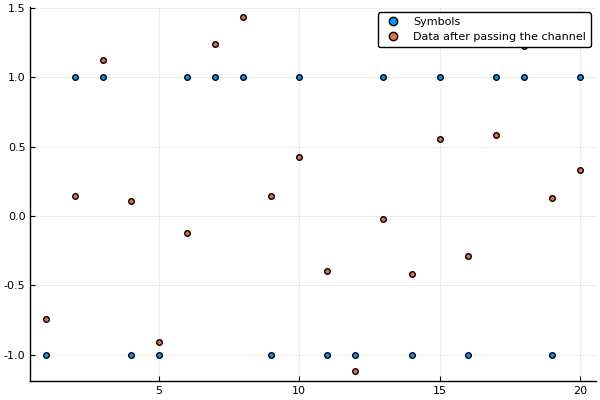

In [168]:
# Figures
scatter(signal[1:20],label="Symbols")
scatter!(y_n[1:20],label="Data after passing the channel")

In [169]:
#4
println("Pe without equalization = $(sum((abs.(y_n-signal)).>1)/n)")

Pe without equalization = 0.1925


## <span style="color:#00B8DE"> LMS filter </span>

In [170]:
# MSE solution (min||w'.data-symb||)
#-----------------------------------

p=10 #filter size
lang=zeros(p)
for j=1:p
    lang[j]=j-1
end
lang=convert(Array{Int64},lang)
H=autocov(y_n,lang)
V=crosscov(y_n,signal,lang)
T=convert(Array{Float64,2},Toeplitz(H,H));
w_mse=inv(T)*V; # w = (D'D)^-1 * D'*signal

In [171]:
p=10 #filter size
y_reduced = zeros(p-1+n)
y_reduced[p:end]=y_n
e=zeros(n)
w_lms=zeros(p)
mu = 1/tr(T) #half the optimal stepsize
print("The used step size is ", mu)

for i=1:n
    y_vec=reverse(y_reduced[i:i-1+p]);  
    w_lms = w_lms -mu.*(y_vec*(w_lms'*y_vec-signal[i]))
    e[i]=norm(w_lms-w_mse)
end

The used step size is 0.09838160363830807

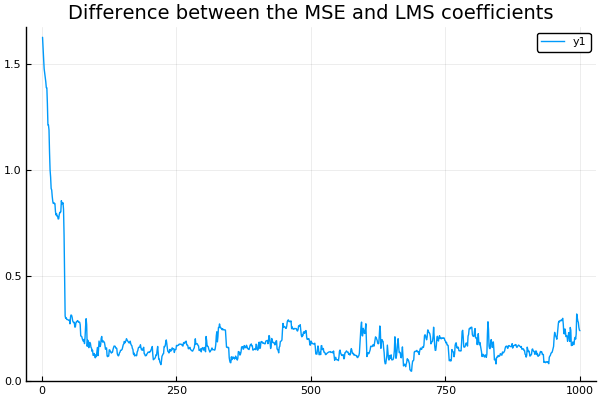

In [172]:
plot(e[1:1000],title="Difference between the MSE and LMS coefficients")

## <span style="color:#00B8DE"> Deconvolution </span>

In [51]:
# 8
# Equalizer design

# Data generation

n = 1000000
h = [1,0.8,0.3]
h = h/norm(h)

signal = sign.(randn(n));

SNR = 15
σ_n = 10^(-SNR/20)

y = conv(signal,h)[1:n]

y_n = y + σ_n*randn(n);

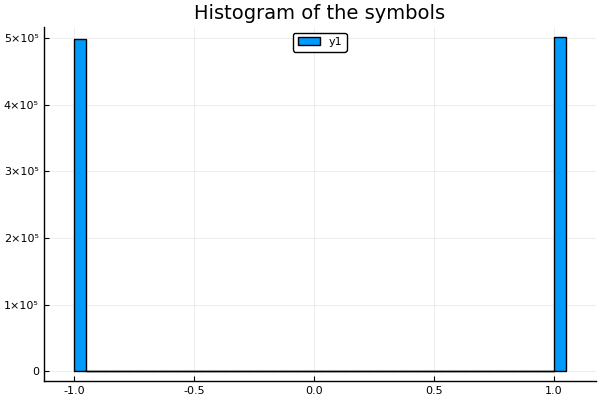

In [52]:
histogram(signal,title="Histogram of the symbols")

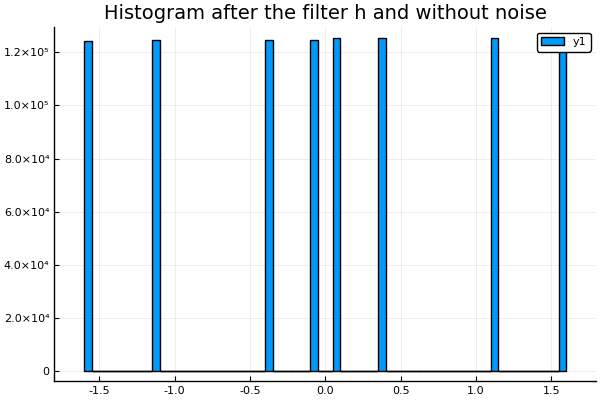

In [53]:
histogram(y,title="Histogram after the filter h and without noise")

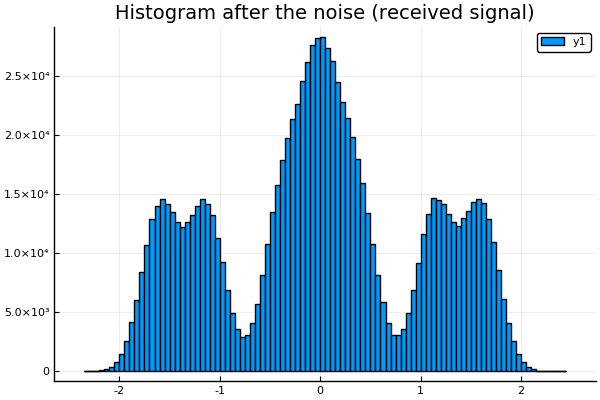

In [54]:
histogram(y_n,title="Histogram after the noise (received signal)")

In the first histogram, we can see the two clearly separated symbols. In the second one, the channel represebted by the filter h introduces delays in the symbols, which creates new peaks. Finally, in the last histogram, we can see how these peaks are all "mixed" by the influence of the white noise.

### <span style="color:#00B8DE"> MSE </span>

In [63]:
# deconvolution
y_hat_mse = conv(y_n,w_mse)[1:n];

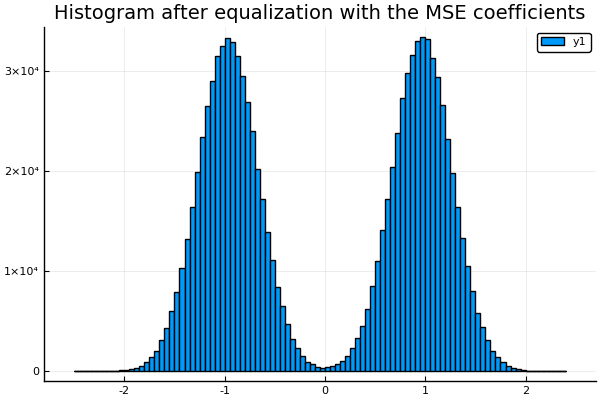

In [72]:
histogram(y_hat_mse, title="Histogram after equalization with the MSE coefficients")

We can now see that the two symbols are clearly distinguishable, as the filter effect has been eliminated. There's only the noise effect left. Has the SNR is not too high, this allows having low probability of error when taking decisions.

In [66]:
println("Pe with equalization with the MSE coefficients = $(sum((abs.(y_hat_mse[10:length(y_hat_mse)]-signal[10:length(y_hat_mse)])).>1)/n)")

Pe with equalization with the MSE coefficients = 0.000908


### <span style="color:#00B8DE"> LMS </span>

In [73]:
# deconvolution
y_hat_lms = conv(y_n,w_lms)[1:n];

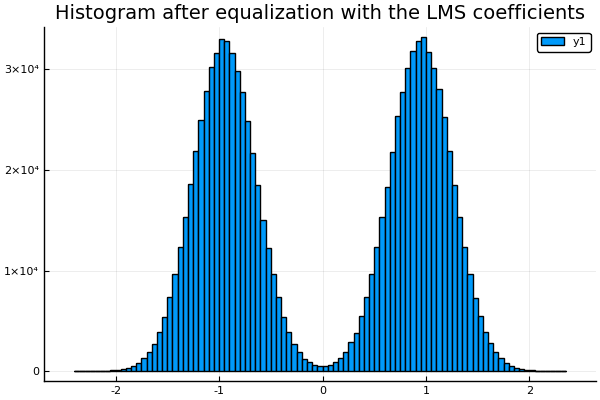

In [74]:
histogram(y_hat_lms, title="Histogram after equalization with the LMS coefficients")

In [77]:
println("Pe with equalization with the LMS coefficients = $(sum((abs.(y_hat_lms[10:length(y_hat_lms)]-signal[10:length(y_hat_lms)])).>1)/n)")

Pe with equalization with the LMS coefficients = 0.001126


We can see, as expected, that there's a small difference between the two performances, being the MSE better than the LMS.

## <span style="color:#00B8DE"> Parameter variation </span>

### <span style="color:#00B8DE"> SNR = 10 dB</span>

In [111]:
# 8
# Equalizer design

# Data generation

n = 1000000
h = [1,0.8,0.3]
h = h/norm(h)

signal = sign.(randn(n));

SNR = 10
σ_n = 10^(-SNR/20)

y = conv(signal,h)[1:n]

y_n = y + σ_n*randn(n);

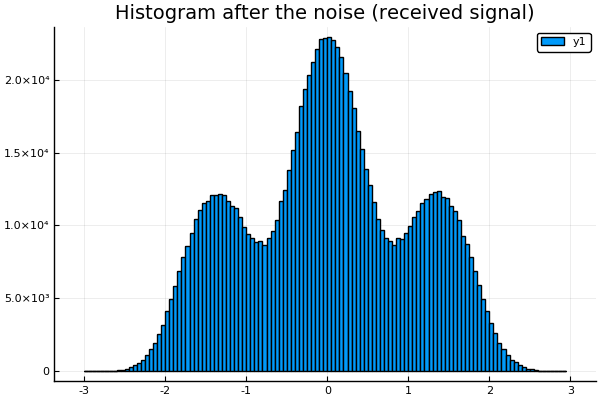

In [112]:
histogram(y_n,title="Histogram after the noise (received signal)")

In [113]:
# deconvolution
y_hat_mse = conv(y_n,w_mse)[1:n];
y_hat_lms = conv(y_n,w_lms)[1:n];

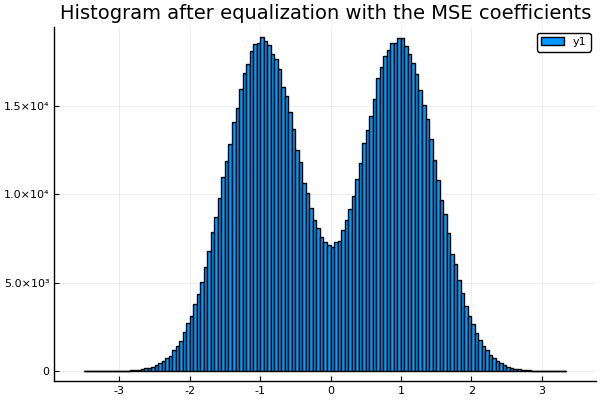

In [114]:
histogram(y_hat_mse, title="Histogram after equalization with the MSE coefficients")

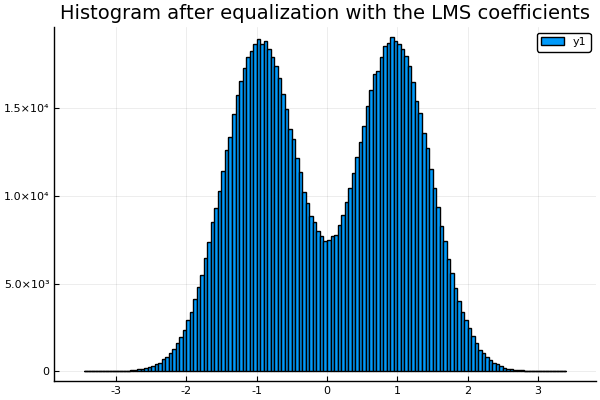

In [115]:
histogram(y_hat_lms, title="Histogram after equalization with the LMS coefficients")

In [116]:
println("Pe without equalization with SNR 10 dB = $(sum((abs.(y_n-signal)).>1)/n)")
println("Pe with equalization with the MSE coefficients with SNR 10 dB = $(sum((abs.(y_hat_mse[10:length(y_hat_mse)]-signal[10:length(y_hat_mse)])).>1)/n)")
println("Pe with equalization with the LMS coefficients with SNR 10 dB = $(sum((abs.(y_hat_lms[10:length(y_hat_lms)]-signal[10:length(y_hat_lms)])).>1)/n)")

Pe without equalization with SNR 10 dB = 0.203842
Pe with equalization with the MSE coefficients with SNR 10 dB = 0.060171
Pe with equalization with the LMS coefficients with SNR 10 dB = 0.05926


We can see that when we decrease the SNR, the equalizer has less effect in lowering the probability of error.

### <span style="color:#00B8DE"> SNR = 5 dB</span>

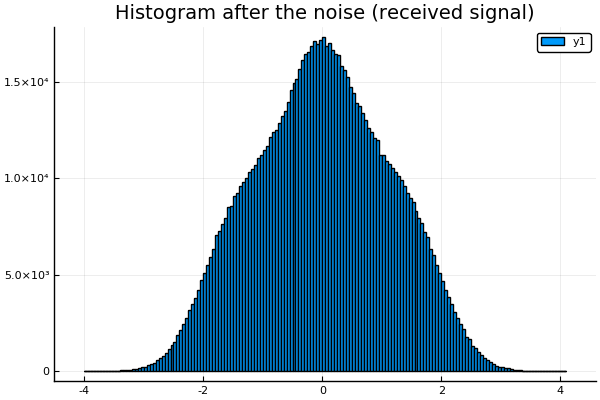

In [106]:
# 8
# Equalizer design

# Data generation

n = 1000000
h = [1,0.8,0.3]
h = h/norm(h)

signal = sign.(randn(n));

SNR = 5
σ_n = 10^(-SNR/20)

y = conv(signal,h)[1:n]

y_n = y + σ_n*randn(n);

histogram(y_n,title="Histogram after the noise (received signal)")

In [107]:
# deconvolution
y_hat_mse = conv(y_n,w_mse)[1:n];
y_hat_lms = conv(y_n,w_lms)[1:n];

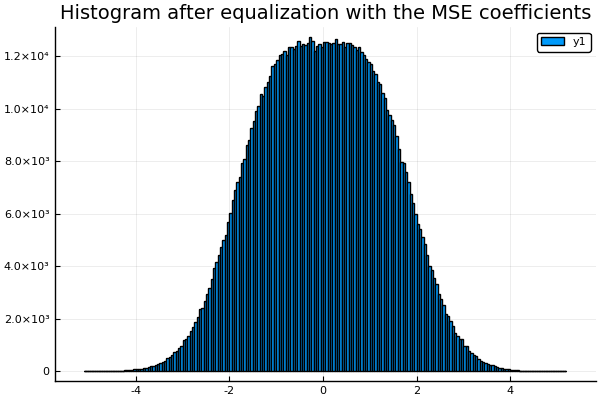

In [108]:
histogram(y_hat_mse, title="Histogram after equalization with the MSE coefficients")

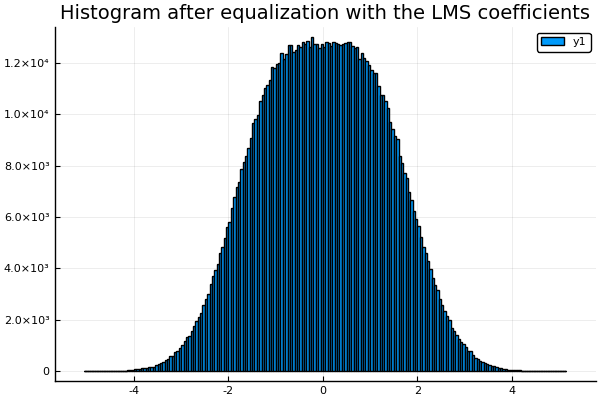

In [109]:
histogram(y_hat_lms, title="Histogram after equalization with the LMS coefficients")

In [110]:
println("Pe without equalization with SNR 5B = $(sum((abs.(y_n-signal)).>1)/n)")
println("Pe with equalization with the MSE coefficients with SNR 5 dB = $(sum((abs.(y_hat_mse[10:length(y_hat_mse)]-signal[10:length(y_hat_mse)])).>1)/n)")
println("Pe with equalization with the LMS coefficients with SNR 5dB = $(sum((abs.(y_hat_lms[10:length(y_hat_lms)]-signal[10:length(y_hat_lms)])).>1)/n)")

Pe without equalization with SNR 5B = 0.282467
Pe with equalization with the MSE coefficients with SNR 5 dB = 0.290165
Pe with equalization with the LMS coefficients with SNR 5dB = 0.284472


For SNR 5 dB, the equalizing filter has no effect in the probability of error.

### <span style="color:#00B8DE"> μ = 0.01 </span>

In [173]:
using Random

n = 10000
h = [1,0.8,0.3]
h = h/norm(h)

signal = sign.(randn(n));

SNR = 20
σ_n = 10^(-SNR/20)

y = conv(signal,h)[1:n];

y_n = y + σ_n*randn(n);

In [174]:
p=10 #filter size
y_reduced = zeros(p-1+n)
y_reduced[p:end]=y_n
e=zeros(n)
w_lms=zeros(p)
mu = 0.01

for i=1:n
    y_vec=reverse(y_reduced[i:i-1+p]);
    
    w_lms = w_lms -mu.*(y_vec*(w_lms'*y_vec-signal[i]))
    e[i]=norm(w_lms-w_mse)
end

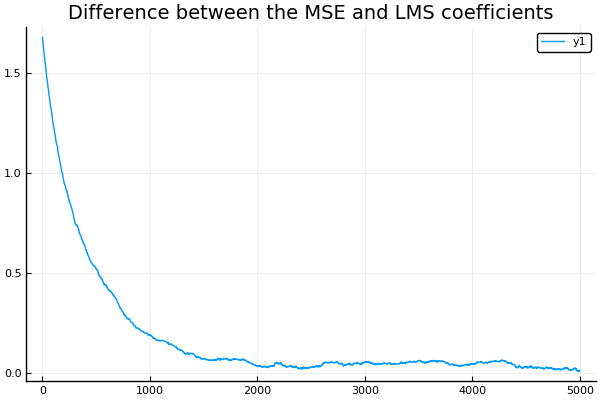

In [175]:
plot(e[1:5000],title="Difference between the MSE and LMS coefficients")

We can see that, as the step size is smaller, the convergence is now better. The price to pay is that the convergence speed is now smaller, but this isn't really a problem as we have lot's of iterations.

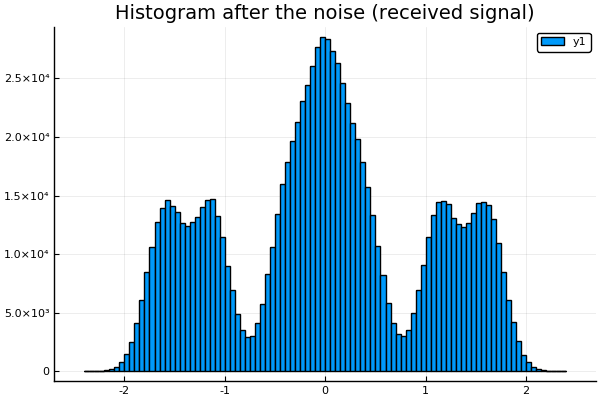

In [176]:
# 8
# Equalizer design

# Data generation

n = 1000000
h = [1,0.8,0.3]
h = h/norm(h)

signal = sign.(randn(n));

SNR = 15
σ_n = 10^(-SNR/20)

y = conv(signal,h)[1:n]

y_n = y + σ_n*randn(n);

histogram(y_n,title="Histogram after the noise (received signal)")

In [177]:
# deconvolution
y_hat_mse = conv(y_n,w_mse)[1:n];
y_hat_lms = conv(y_n,w_lms)[1:n];

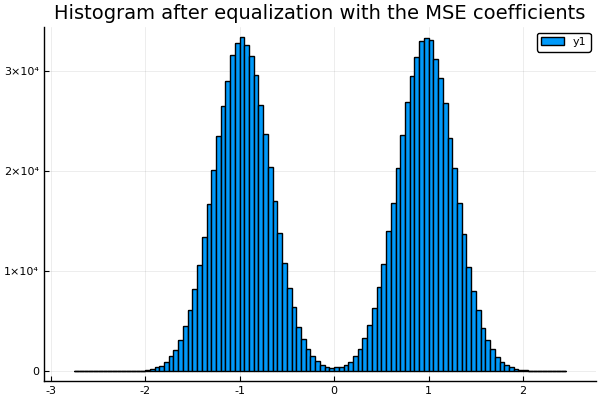

In [178]:
histogram(y_hat_mse, title="Histogram after equalization with the MSE coefficients")

In [179]:
println("Pe without equalization= $(sum((abs.(y_n-signal)).>1)/n)")
println("Pe with equalization with the MSE coefficients = $(sum((abs.(y_hat_mse[10:length(y_hat_mse)]-signal[10:length(y_hat_mse)])).>1)/n)")
println("Pe with equalization with the LMS coefficients = $(sum((abs.(y_hat_lms[10:length(y_hat_lms)]-signal[10:length(y_hat_lms)])).>1)/n)")

Pe without equalization= 0.173203
Pe with equalization with the MSE coefficients = 0.000931
Pe with equalization with the LMS coefficients = 0.00085


We can now see that the performances between the two algorithms are more similar, as a consequence that there's now less difference between the LMS and the MSE coefficients.

### <span style="color:#00B8DE"> μ = 0.2 </span>

We try increasing the step size to increase the convergence speed.

In [180]:
using Random

n = 10000
h = [1,0.8,0.3]
h = h/norm(h)

signal = sign.(randn(n));

SNR = 20
σ_n = 10^(-SNR/20)

y = conv(signal,h)[1:n];

y_n = y + σ_n*randn(n);

In [181]:
p=10 #filter size
y_reduced = zeros(p-1+n)
y_reduced[p:end]=y_n
e=zeros(n)
w_lms=zeros(p)
mu = 0.2

for i=1:n
    y_vec=reverse(y_reduced[i:i-1+p]);
    
    w_lms = w_lms -mu.*(y_vec*(w_lms'*y_vec-signal[i]))
    e[i]=norm(w_lms-w_mse)
end

In [187]:
w_lms

10-element Array{Float64,1}:
 NaN
 NaN
 NaN
 NaN
 NaN
 NaN
 NaN
 NaN
 NaN
 NaN

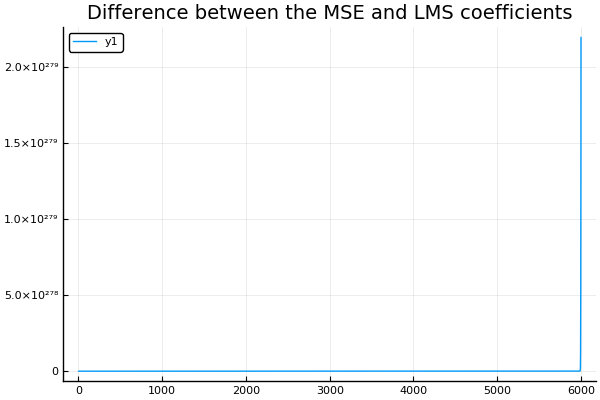

In [186]:
plot(e[1:6000],title="Difference between the MSE and LMS coefficients")

However, we can see that with a bigger step size, the coefficients diverge and we cannot apply the filter.